# Classification Model Feature Selection

In [1]:
import datetime
print(datetime.datetime.now())

2020-02-13 16:15:16.097864


In [2]:
# Imports
import pandas as pd
import numpy as np

import sklearn.metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import dataset
df = pd.read_csv("Churn_Modelling.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Check for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Drop RowNumber, CustomerId and Surname as they do not add value to our model
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)

## Feature Engineering

### Feature Scaling

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Min-Max Scaling for Age
scaler = MinMaxScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])

# Standardization for Tenure, Balance, EstimatedSalary, CreditScore
df[['Tenure','Balance','EstimatedSalary','CreditScore']] = scaler.fit_transform(df[['Tenure','Balance','EstimatedSalary','CreditScore']])

### Categorical Variables

In [8]:
# Convert gender to boolean variable
# Female = False and Male = True
df['Gender'] = df['Gender'].replace({"Female":0, "Male":1})
df['Gender'] = df['Gender'].apply(bool)

#### One-Hot Encoding

In [9]:
# One hot encode Geography, Gender, NumOfProducts
df = pd.get_dummies(df, columns=['Geography'])
df = pd.get_dummies(df, columns=['NumOfProducts'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
CreditScore          10000 non-null float64
Gender               10000 non-null bool
Age                  10000 non-null float64
Tenure               10000 non-null float64
Balance              10000 non-null float64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_France     10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
NumOfProducts_1      10000 non-null uint8
NumOfProducts_2      10000 non-null uint8
NumOfProducts_3      10000 non-null uint8
NumOfProducts_4      10000 non-null uint8
dtypes: bool(1), float64(5), int64(3), uint8(7)
memory usage: 703.2 KB


In [11]:
# Resort columns
df = df[['Age','Gender','Tenure','CreditScore','Balance','EstimatedSalary','Geography_France','Geography_Germany','Geography_Spain','HasCrCard','IsActiveMember','NumOfProducts_1','NumOfProducts_2','NumOfProducts_3','NumOfProducts_4','Exited']]

## Define X and y for model

In [12]:
X = df.iloc[:,0:-1] #get independent features
y = df.iloc[:,-1] #get target

## Feature Selection Methods

### 1. Filter Method - Pearson Correlation

In [13]:
# The correlation coefficient has values between -1 to 1
## A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
## A value closer to 1 implies stronger positive correlation
## A value closer to -1 implies stronger negative correlation

cor = df.corr().round(2)
cor

,Age,Gender,Tenure,CreditScore,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Exited
Age,1.00,-0.03,-0.01,-0.00,0.03,-0.01,-0.04,0.05,-0.00,-0.01,0.09,0.07,-0.10,0.07,0.05,0.29
Gender,-0.03,1.00,0.01,-0.00,0.01,-0.01,0.01,-0.02,0.02,0.01,0.02,0.01,0.01,-0.04,-0.03,-0.11
Tenure,-0.01,0.01,1.00,0.00,-0.01,0.01,-0.00,-0.00,0.00,0.02,-0.03,-0.01,0.01,-0.00,0.01,-0.01
CreditScore,-0.00,-0.00,0.00,1.00,0.01,-0.00,-0.01,0.01,0.00,-0.01,0.03,-0.01,0.02,-0.00,0.00,-0.03
Balance,0.03,0.01,-0.01,0.01,1.00,0.01,-0.23,0.40,-0.13,-0.01,-0.01,0.36,-0.36,-0.00,0.02,0.12
EstimatedSalary,-0.01,-0.01,0.01,-0.00,0.01,1.00,-0.00,0.01,-0.01,-0.01,-0.01,-0.01,0.01,0.01,0.01,0.01
Geography_France,-0.04,0.01,-0.00,-0.01,-0.23,-0.00,1.00,-0.58,-0.58,0.00,0.00,-0.01,0.03,-0.04,-0.00,-0.10
Geography_Germany,0.05,-0.02,-0.00,0.01,0.40,0.01,-0.58,1.00,-0.33,0.01,-0.02,0.03,-0.05,0.04,0.03,0.17
Geography_Spain,-0.00,0.02,0.00,0.00,-0.13,-0.01,-0.58,-0.33,1.00,-0.01,0.02,-0.02,0.02,0.00,-0.02,-0.05
HasCrCard,-0.01,0.01,0.02,-0.01,-0.01,-0.01,0.00,0.01,-0.01,1.00,-0.01,-0.00,0.00,0.00,-0.00,-0.01


Text(0.5, 1, 'Correlation test')

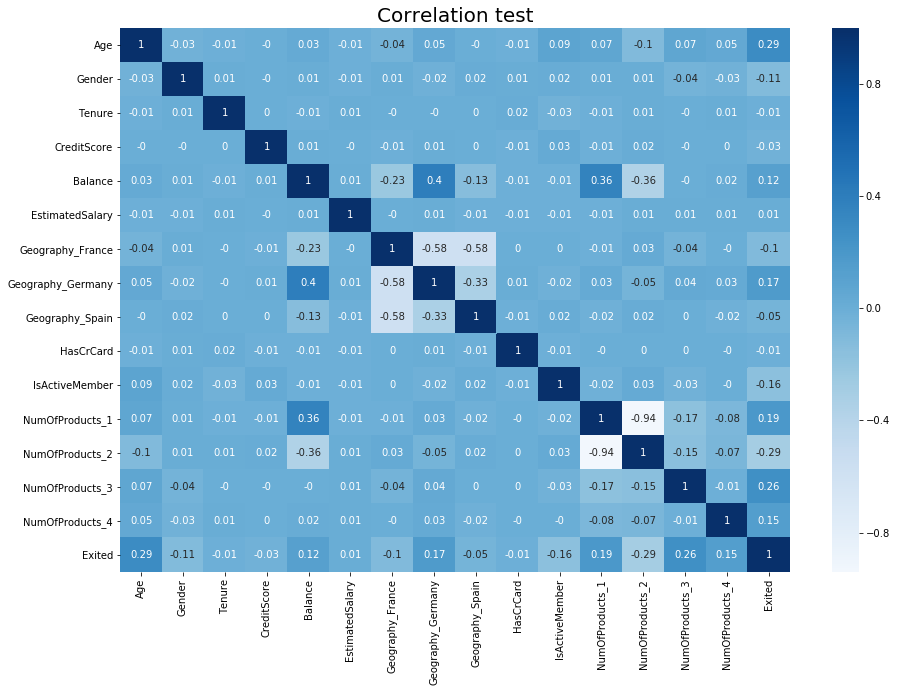

In [14]:
# Plot heatmap between attributes

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cor, center=0, cmap = 'Blues', annot = True, annot_kws={"size": 10})
ax.set_title('Correlation test', fontsize=20)

In [15]:
# List of variables with over 0.05 threshold correlation with target

a = abs(cor['Exited'])
result = a[a>0.05]
result

Age                  0.29
Gender               0.11
Balance              0.12
Geography_France     0.10
Geography_Germany    0.17
IsActiveMember       0.16
NumOfProducts_1      0.19
NumOfProducts_2      0.29
NumOfProducts_3      0.26
NumOfProducts_4      0.15
Exited               1.00
Name: Exited, dtype: float64

### 2. KBest Feature Selection

In [16]:
# Select K number of best features
## For classification use chi2, f_classif, mutual_info_classif
## For regression use f_regression, mutual_info_regression

from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(chi2, k=10)
kfit = kbest.fit(X, y)

kscores = pd.DataFrame(kfit.scores_)
kcolumns = pd.DataFrame(X.columns)

# Concatenate both data frames
featureScores = pd.concat([kcolumns, kscores], axis=1)

featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

             Features       Score
13    NumOfProducts_3  637.239136
12    NumOfProducts_2  462.775775
14    NumOfProducts_4  234.550810
7   Geography_Germany  225.464426
11    NumOfProducts_1  169.063641
10     IsActiveMember  118.199414
0                 Age   57.832080
6    Geography_France   54.923705
1              Gender   51.539926
4             Balance   28.502819


### 3. Tree-Based Feature Importance (Extra Trees Classifier)

In [17]:
# Create a extra tree classifier
# List top 10 features based on their importance

from sklearn.ensemble import ExtraTreesClassifier

extra_tree_class = ExtraTreesClassifier()
extra_tree_class.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [18]:
treeFeature_imp = extra_tree_class.feature_importances_
treeFeature_std = np.std([tree.feature_importances_ for tree in extra_tree_class.estimators_], axis=0)

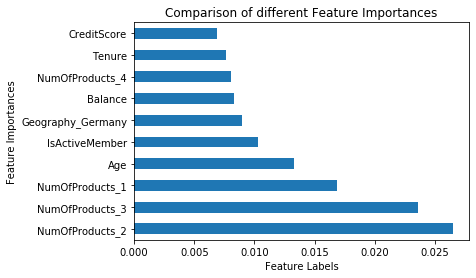

In [19]:
feat_importances = pd.Series(treeFeature_std, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

### 4. Wrapper Method

#### 4.1 Step Forward Selection

In [33]:
# Start with no features in the model
# In each iteration, add a feature which best improve the model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Build Random Forest model for feature selection
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

sfs = SequentialFeatureSelector(DT, k_features=10, forward=True, floating=False, scoring='accuracy', verbose=2, cv=5)
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished

[2020-02-13 16:34:30] Features: 1/10 -- score: 0.7361775007777946[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.8s finished

[2020-02-13 16:34:31] Features: 2/10 -- score: 0.7915675462268179[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.9s finished

[2020-02-13 16:34:32] Features: 3/10 -- score: 0.8023239108255916[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [35]:
sfs_features = list(sfs.k_feature_idx_)
print(sf_features)

# Identify features using column index in the dataframe
print(X.columns)

[0, 1, 3, 4, 6, 7, 8, 10, 11, 12]
Index(['Age', 'Gender', 'Tenure', 'CreditScore', 'Balance', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain', 'HasCrCard',
       'IsActiveMember', 'NumOfProducts_1', 'NumOfProducts_2',
       'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')


#### 4.2 Backward Elimination

In [50]:
sbe = SequentialFeatureSelector(DT, k_features=10, forward=False, floating=False, scoring='accuracy', verbose=2, cv=5)
sbe = sbe.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.3s finished

[2020-02-13 16:48:37] Features: 14/10 -- score: 0.7924285714285715[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    3.0s finished

[2020-02-13 16:48:40] Features: 13/10 -- score: 0.7949999999999999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.1s finished

[2020-02-13 16:48:42] Features: 12/10 -- score: 0.8024285714285714[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [38]:
sbe_features = list(sbe.k_feature_idx_)
print(sbe_features)

# Identify features using column index in the dataframe
print(X.columns)

[0, 1, 4, 6, 7, 8, 10, 11, 12, 14]
Index(['Age', 'Gender', 'Tenure', 'CreditScore', 'Balance', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain', 'HasCrCard',
       'IsActiveMember', 'NumOfProducts_1', 'NumOfProducts_2',
       'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')


#### 4.3 Recursive Feature elimination

In [46]:
from sklearn.feature_selection import RFECV

rfe = RFECV(DT, step=1, scoring='accuracy', cv=5)
rfe = rfe.fit(X_train, y_train)

In [47]:
print("Optimal number of features : %d" % rfe.n_features_)
rfe.get_support(indices=True)
X_train.columns[rfe.get_support()]

Optimal number of features : 14


Index(['Age', 'Gender', 'Tenure', 'CreditScore', 'Balance', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain', 'HasCrCard',
       'IsActiveMember', 'NumOfProducts_1', 'NumOfProducts_2',
       'NumOfProducts_3'],
      dtype='object')

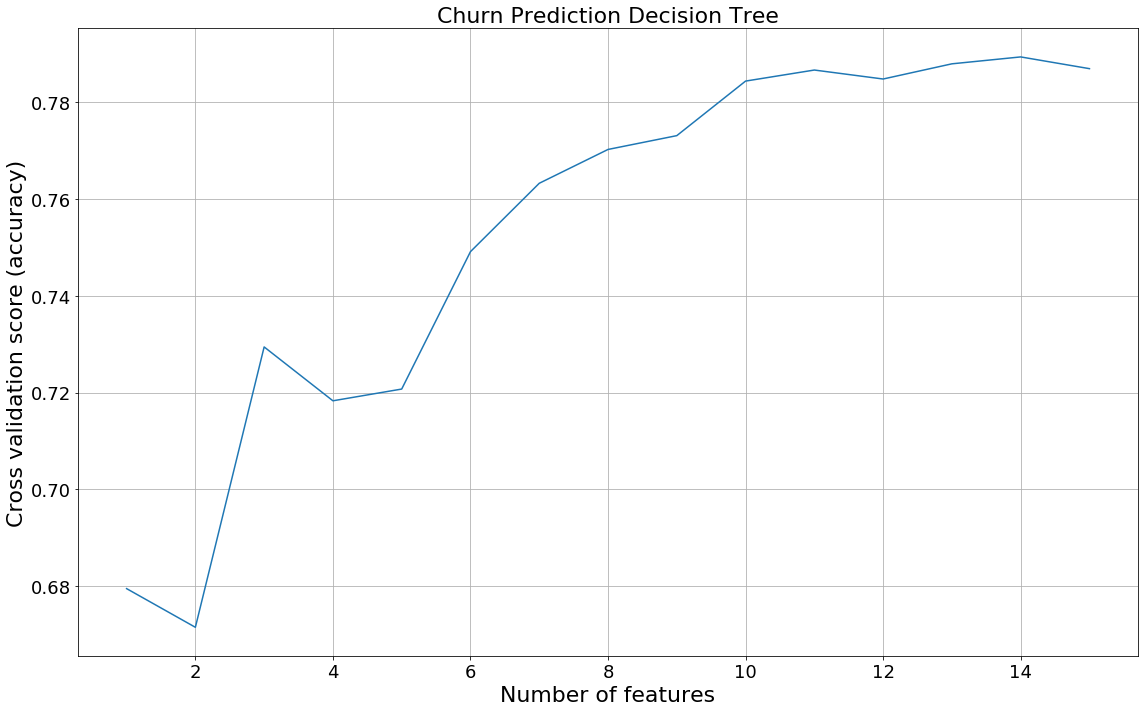

In [49]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(16, 10));
plt.grid(True);
plt.title('Churn Prediction Decision Tree', fontsize=22);
plt.xlabel("Number of features", fontsize=22);
plt.ylabel("Cross validation score (accuracy)", fontsize=22);
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.tight_layout();